In [2]:
from utils.helper import  *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# read all trials
n_trials = 3
n_iter = 20
f_dir = 'diagnostic_data/softness_test_bare/'
all_trials = list()
for i in range(2,n_trials+1):
    for j in range(1,n_iter+1):
        if (i == 1) & (j == 20):
            continue
        fname = f_dir + f"stiff_block_trial{i}_{j}.tact"
        temp_df = read_tac_file(fname)
        temp_df = temp_df[temp_df.taxel != 0]
        temp_df = temp_df.assign(iteration = j)
        temp_df = temp_df.assign(trial = i)
        all_trials.append(temp_df)

In [26]:
df = pd.concat(all_trials)

In [27]:
def map_to_finger(taxel_id):
    if (taxel_id <= 39) & (taxel_id >=1):
        return 'left_finger'
    else:
        return 'right_finger'

df = df.assign(finger_type = df.taxel.apply(map_to_finger))

In [28]:
df.head()

,isNeg,taxel,time,iteration,trial,finger_type
0,0,43,1.605262e+09,1,2,right_finger
1,0,43,1.605262e+09,1,2,right_finger
2,0,43,1.605262e+09,1,2,right_finger
3,0,43,1.605262e+09,1,2,right_finger
4,0,13,1.605262e+09,1,2,left_finger


In [30]:
count_df = df.groupby(['iteration', 'trial']).count().reset_index()

In [31]:
count_df.head()

,iteration,trial,isNeg,taxel,time,finger_type
0,1,2,1138,1138,1138,1138
1,1,3,1297,1297,1297,1297
2,2,2,1286,1286,1286,1286
3,2,3,1189,1189,1189,1189
4,3,2,1102,1102,1102,1102


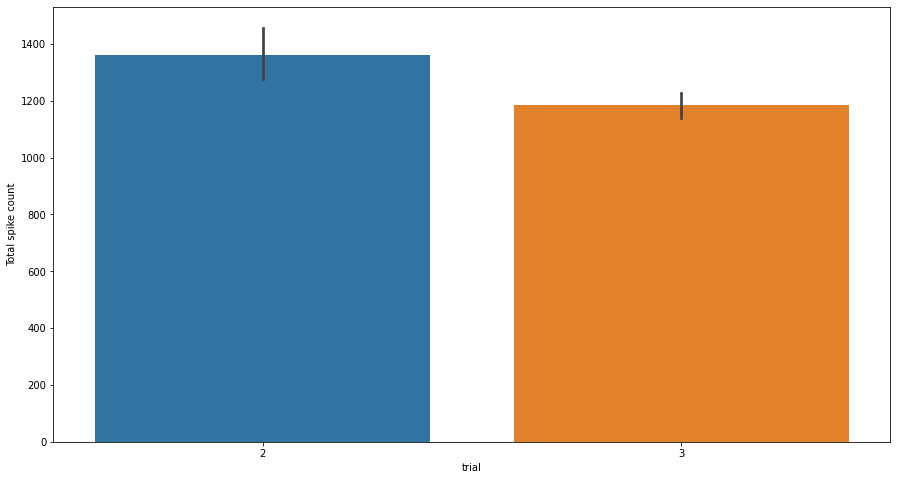

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'trial', y='time', data=count_df)
#ax.set_ylim([5400,6400])
ax.set_ylabel('Total spike count')
plt.show()

### Thoughts
1. No substantial difference between switching on and switching off the board 
2. No much correlation on warming up (no idea)

In [34]:
count_df = df.groupby(['iteration', 'trial', 'isNeg']).count().reset_index()

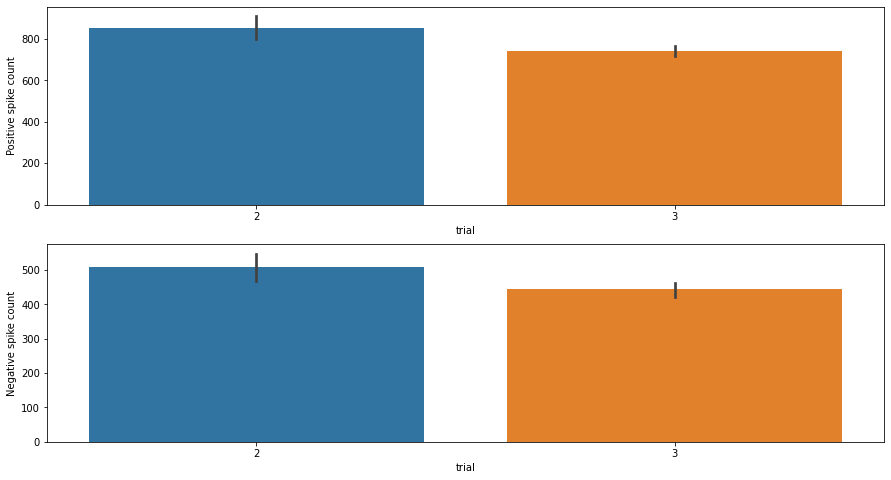

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
sns.barplot(ax=ax[0], x = 'trial', y='time',  data=count_df[count_df.isNeg==0])
#ax[0].set_ylim([2400,3000])
ax[0].set_ylabel('Positive spike count')
sns.barplot(ax=ax[1], x = 'trial', y='time',  data=count_df[count_df.isNeg==1])
#ax[1].set_ylim([2900,3500])
ax[1].set_ylabel('Negative spike count')
plt.show()

### Notes:
1. Some correlation in trend between pos and neg spike counts
2. Generally slightly more negative spikes than positive ones

In [39]:
count_df = df.groupby(['iteration', 'trial', 'finger_type']).count().reset_index()

In [40]:
count_df

,iteration,trial,finger_type,isNeg,taxel,time
0,1,2,left_finger,689,689,689
1,1,2,right_finger,449,449,449
2,1,3,left_finger,628,628,628
3,1,3,right_finger,669,669,669
4,2,2,left_finger,781,781,781
...,...,...,...,...,...,...
75,19,3,right_finger,287,287,287
76,20,2,left_finger,953,953,953
77,20,2,right_finger,453,453,453
78,20,3,left_finger,625,625,625


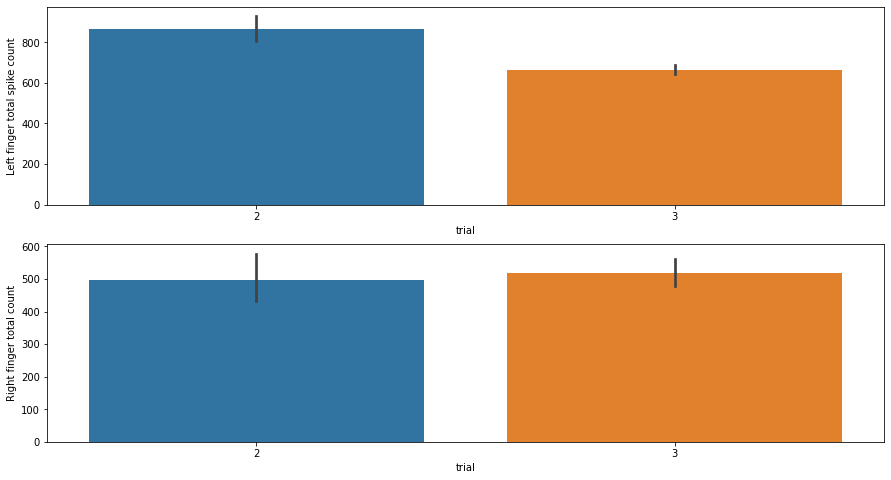

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
sns.barplot(ax=ax[0], x = 'trial', y='time',  data=count_df[count_df.finger_type=='left_finger'])
#ax[0].set_ylim([3800,4700])
ax[0].set_ylabel('Left finger total spike count')
sns.barplot(ax=ax[1], x = 'trial', y='time',  data=count_df[count_df.finger_type=='right_finger'])
#ax[1].set_ylim([1500, 1900])
ax[1].set_ylabel('Right finger total count')
plt.show()

### Notes (finger-wise)
1. Left finger spikes more than right one
2. No correlation between spike counts for switching on and off

In [43]:
count_df = df.groupby(['iteration', 'trial', 'finger_type', 'isNeg']).count().reset_index()

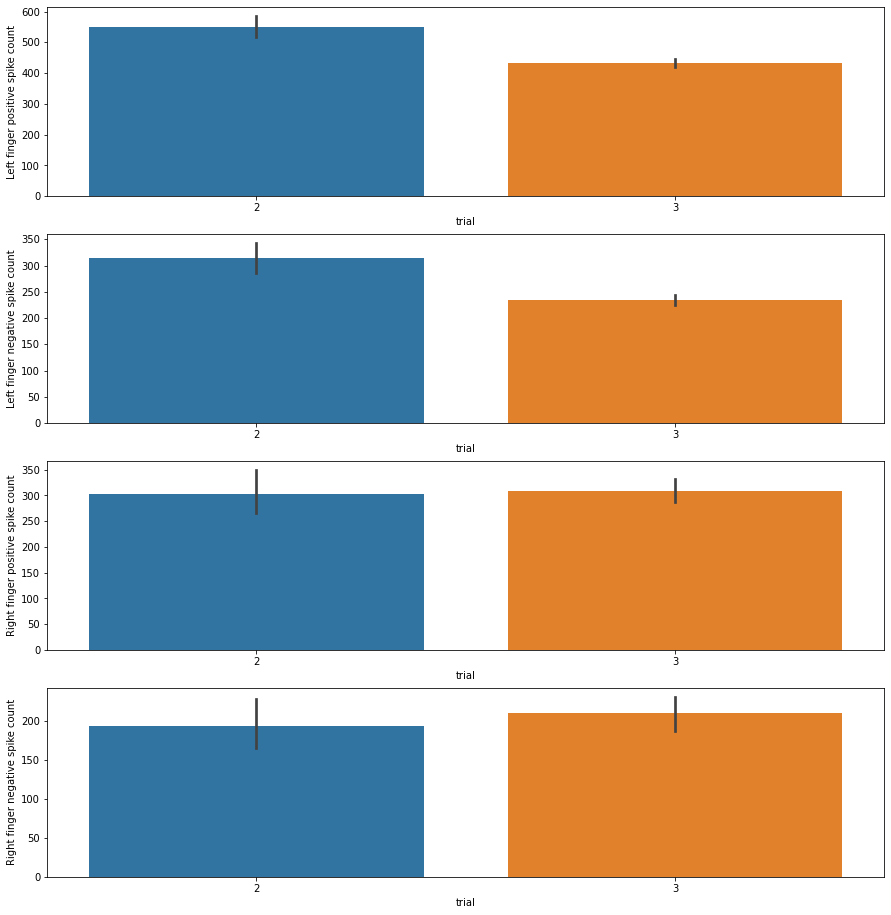

In [45]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,16))

left_finger_mask = (count_df.finger_type=='left_finger')
right_finger_maks = ~left_finger_mask
negative_mask = (count_df.isNeg == 1)
positive_mask = ~negative_mask

sns.barplot(ax=ax[0], x = 'trial', y='time',  data=count_df[left_finger_mask & positive_mask])
#ax[0].set_ylim([1600,2200])
ax[0].set_ylabel('Left finger positive spike count')
sns.barplot(ax=ax[1], x = 'trial', y='time',  data=count_df[left_finger_mask & negative_mask])
#ax[1].set_ylim([2000, 2600])
ax[1].set_ylabel('Left finger negative spike count')

sns.barplot(ax=ax[2], x = 'trial', y='time',  data=count_df[right_finger_maks & positive_mask])
#ax[2].set_ylim([600,900])
ax[2].set_ylabel('Right finger positive spike count')
sns.barplot(ax=ax[3], x = 'trial', y='time',  data=count_df[right_finger_maks & negative_mask])
#ax[3].set_ylim([800, 1200])
ax[3].set_ylabel('Right finger negative spike count')

plt.show()

Notes (finger-wise)
1. More negative spikes than positive ones